This notebook demonstrates a simple linear regression analysis using [R] to model Salary based on Years of Experience.

This read the CSV into DataFrame

In [39]:
library(ggplot2)
dataset <- read.csv("regression_data.csv")   ## Tell R to read the data file

This step use lm to fit a linear regression model

In [40]:
model <- lm(Salary ~ YearsExperience, data = dataset)

This step extracts the parameters and evaluates the model's fit

In [41]:
slope <- coef(model)[2]
intercept <- coef(model)[1]
r <- cor(dataset$YearsExperience, dataset$Salary)
pred <- predict(model)
mse <- mean((dataset$Salary - pred)^2)

print(paste("slope =", slope))
print(paste("intercept =", intercept))
print(paste("r =", r))
print(paste("MSE =", mse))

[1] "slope = 8285.29209990353"
[1] "intercept = 29203.5226712402"
[1] "r = 0.886087798309884"
[1] "MSE = 17523844.0829028"


This step plots the scattered row data and uses ggplot to plot the regression line

Saving 7 x 7 in image


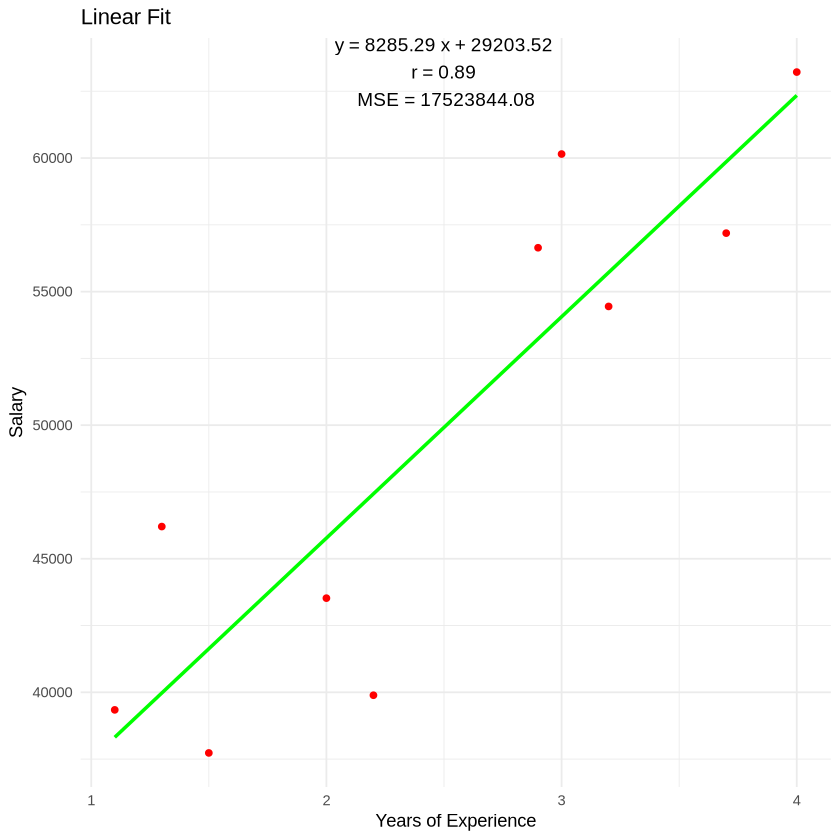

In [42]:
# Plot
ggplot(dataset, aes(x = YearsExperience, y = Salary)) +
  geom_point(color = "red") +
  geom_smooth(aes(x = YearsExperience, y = Salary), method = "lm", formula = y ~ x, se = FALSE, color = "green") +
  annotate("text", x = 2.51, y = max(dataset$Salary) - 0.5,
           label = paste("y =", round(slope, 2), "x +", round(intercept, 2),
                         "\nr =", round(r, 2), "\nMSE =", round(mse, 2)),
           size = 4) +
  labs(title = "Linear Fit",
       x = "Years of Experience", y = "Salary") +
  theme_minimal()

ggsave("regression_plot_r.png")

This step views the coefficients that evaluate the model

In [43]:
summary(model)  ## Parameters that evaluates the fit


Call:
lm(formula = Salary ~ YearsExperience, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7540.2 -2564.9  -199.1  2814.8  6230.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        29204       4092   7.136 9.84e-05 ***
YearsExperience     8285       1532   5.407 0.000641 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4680 on 8 degrees of freedom
Multiple R-squared:  0.7852,	Adjusted R-squared:  0.7583 
F-statistic: 29.24 on 1 and 8 DF,  p-value: 0.0006407
